In [1]:
# Project PyAutomata Performance Testing
"""
This notebook exists as a means to evaluate Rust v. Python logic computation.
"""
# Third-Party Modules
import matplotlib.pyplot as plt

# Local Modules
from pyautomata import Automata, Canvas
from pyautomata.handlers import RUST_AVAILABLE
from pyautomata.handlers.benchmark import get_comparison_benchmarks

# Global Variables
automata = Automata(30)
canvas = Canvas(automata, generate=False)

In [2]:
# Generation Calculation
"""
Rust is near instant on modern computers for values less than 10000.
Python is significantly slower and 10000 will start to become several minutes,
  with higher values quickly taking hours.

A print statement will track the progress as it works through the dataset.
"""
start = 500
stop = 10000
step = 500

rust_benchmarks, python_benchmarks = get_comparison_benchmarks(start, stop, step)

Completed generation benchmarks for both Rust and Python.


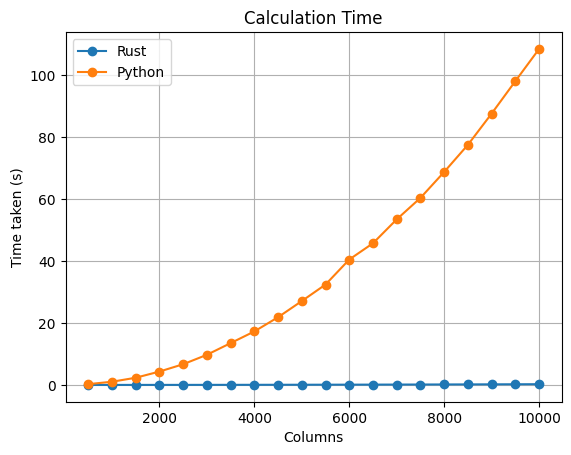

In [3]:
# Graph the time taken to calculate

for i in [rust_benchmarks, python_benchmarks]:
    plt.plot(i.data.keys(), i.data.values(), marker='o', linestyle='-', label=i.engine.value)

plt.xlabel('Columns')
plt.ylabel('Time taken (s)')
plt.title('Calculation Time')
plt.grid(True)
plt.legend()
plt.show()

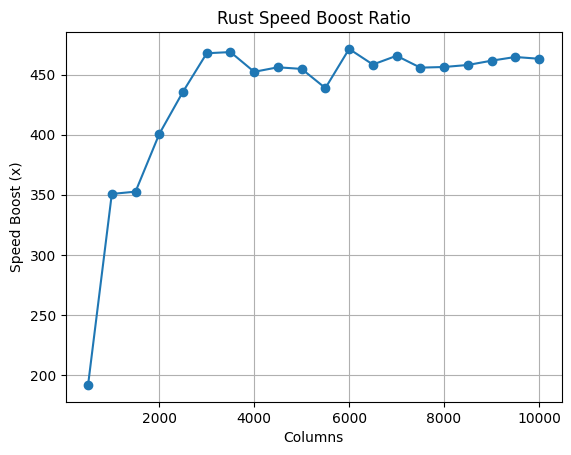

In [4]:
# Rust Speed Ratio

rust_boost = {}

if not RUST_AVAILABLE:
    raise ValueError('Rust must be available for this test')

for columns in rust_benchmarks.data:
    rust_boost[columns] = python_benchmarks.data[columns] / rust_benchmarks.data[columns]


plt.plot(rust_boost.keys(), rust_boost.values(), marker='o', linestyle='-')
plt.xlabel('Columns')
plt.ylabel('Speed Boost (x)')
plt.title('Rust Speed Boost Ratio')
plt.grid(True)
plt.show()